<div class="alert alert-block alert-info">
<span style="color: rgb(0,53,91);">
<center><img src="https://www.redage.org/sites/default/files/styles/large/public/img-logo-institucion/logo_iteso.jpg?itok=IzloBJS1" style="width:500px;height:142px;" title="Logo ITESO"></center>

<font face = "Times New Roman" size = "6"><b><center>Programacion para Mineria de Datos</center></b></font>
<font face = "Times New Roman" size = "5"><b><center>Preprocesamiento PCA</center></b></font>

<b><font back = "Times New Roman" size = "4"><center>Examen Parcial 3</center></font>
<div align="right"><font face = "Times New Roman" size = "2">nombres: Angel Aceves Manzo</font></div>
<div align="right"><font face = "Times New Roman" size = "2"> Jorge Arturo Ponce Martin</font></div>
<div align="right"><font face = "Times New Roman" size = "2"> Jesus Vargas Pacheco</font></div>
</span></div>

# 01_A_Preprocessing

## Instalar librerías en caso de ser necesario

In [1]:
%pip install numpy pandas matplotlib seaborn scikit-learn joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Importar librerías necesarias

In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import joblib
import json
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

## 1. Carga de Datos

In [3]:
# Cargar el dataset
df = pd.read_csv('../../data/Saratoga.csv')

# Mostrar información básica
print(f"Dimensiones del dataset: {df.shape}")
print(f"\nPrimeras 5 filas:")
df.head()

Dimensiones del dataset: (1718, 16)

Primeras 5 filas:


,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir,price
0,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No,132500
1,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No,181115
2,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No,109000
3,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No,155000
4,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes,86060


In [4]:
# Información del dataset
print("Información del dataset:")
print(df.info())
print("\n" + "="*80)
print("\nEstadísticas descriptivas:")
df.describe()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lotSize          1718 non-null   float64
 1   age              1718 non-null   int64  
 2   landValue        1718 non-null   int64  
 3   livingArea       1718 non-null   int64  
 4   pctCollege       1718 non-null   int64  
 5   bedrooms         1718 non-null   int64  
 6   fireplaces       1718 non-null   int64  
 7   bathrooms        1718 non-null   float64
 8   rooms            1718 non-null   int64  
 9   heating          1718 non-null   object 
 10  fuel             1718 non-null   object 
 11  sewer            1718 non-null   object 
 12  waterfront       1718 non-null   object 
 13  newConstruction  1718 non-null   object 
 14  centralAir       1718 non-null   object 
 15  price            1718 non-null   int64  
dtypes: float64(2), int64(8), object(6)


,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,price
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000
mean,0.500186,27.870780,34598.440047,1753.448196,55.553551,3.152503,0.600698,1.900175,7.037835,211763.064028
std,0.700520,29.227676,35108.173075,619.727599,10.356054,0.816988,0.555629,0.658323,2.312577,98439.792025
min,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000,5000.000000
25%,0.170000,13.000000,15100.000000,1300.250000,52.000000,3.000000,0.000000,1.500000,5.000000,145000.000000
50%,0.370000,19.000000,25000.000000,1632.000000,57.000000,3.000000,1.000000,2.000000,7.000000,189900.000000
75%,0.540000,33.750000,40200.000000,2130.500000,64.000000,4.000000,1.000000,2.500000,8.000000,257000.000000
max,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000,775000.000000


## 2. Análisis Exploratorio y Limpieza de Datos

In [5]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())
print(f"\nTotal de valores nulos: {df.isnull().sum().sum()}")

# Verificar valores duplicados
print(f"\nFilas duplicadas: {df.duplicated().sum()}")

Valores nulos por columna:
lotSize            0
age                0
landValue          0
livingArea         0
pctCollege         0
bedrooms           0
fireplaces         0
bathrooms          0
rooms              0
heating            0
fuel               0
sewer              0
waterfront         0
newConstruction    0
centralAir         0
price              0
dtype: int64

Total de valores nulos: 0

Filas duplicadas: 7


In [6]:
# Identificar variables numéricas y categóricas
variables_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
variables_categoricas = df.select_dtypes(include=['object']).columns.tolist()

print(f"Variables numéricas ({len(variables_numericas)}): {variables_numericas}")
print(f"\nVariables categóricas ({len(variables_categoricas)}): {variables_categoricas}")

Variables numéricas (10): ['lotSize', 'age', 'landValue', 'livingArea', 'pctCollege', 'bedrooms', 'fireplaces', 'bathrooms', 'rooms', 'price']

Variables categóricas (6): ['heating', 'fuel', 'sewer', 'waterfront', 'newConstruction', 'centralAir']


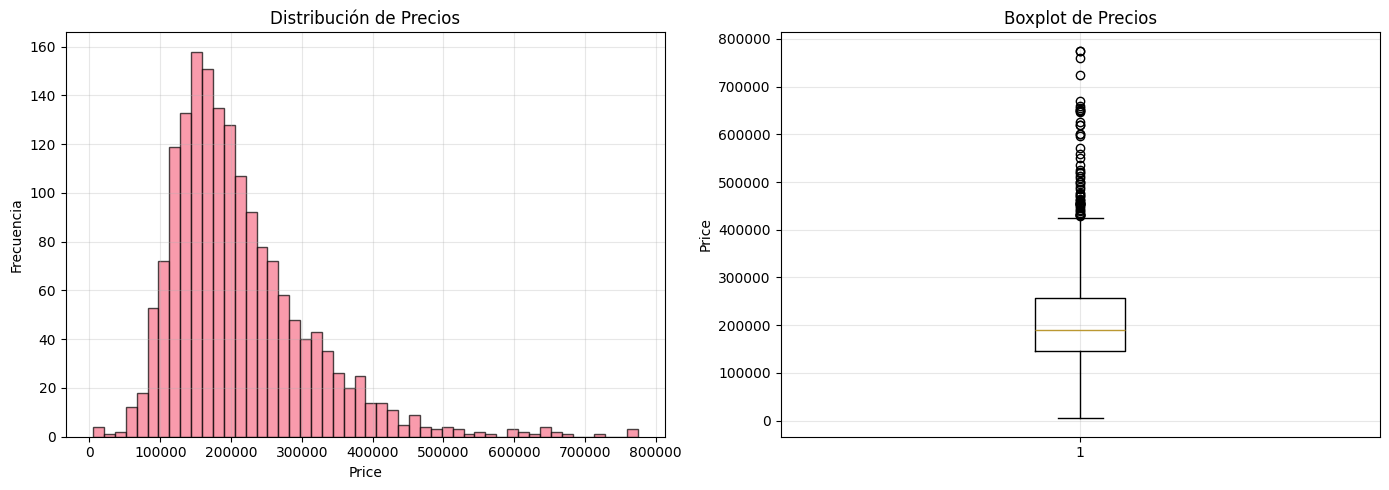

Precio promedio: $211,763.06
Precio mediano: $189,900.00
Precio mínimo: $5,000.00
Precio máximo: $775,000.00


In [7]:
# Visualizar distribución de la variable objetivo (price)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['price'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Precios')
axes[0].grid(True, alpha=0.3)

axes[1].boxplot(df['price'], vert=True)
axes[1].set_ylabel('Price')
axes[1].set_title('Boxplot de Precios')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('boxplots_numericas.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Precio promedio: ${df['price'].mean():,.2f}")
print(f"Precio mediano: ${df['price'].median():,.2f}")
print(f"Precio mínimo: ${df['price'].min():,.2f}")
print(f"Precio máximo: ${df['price'].max():,.2f}")

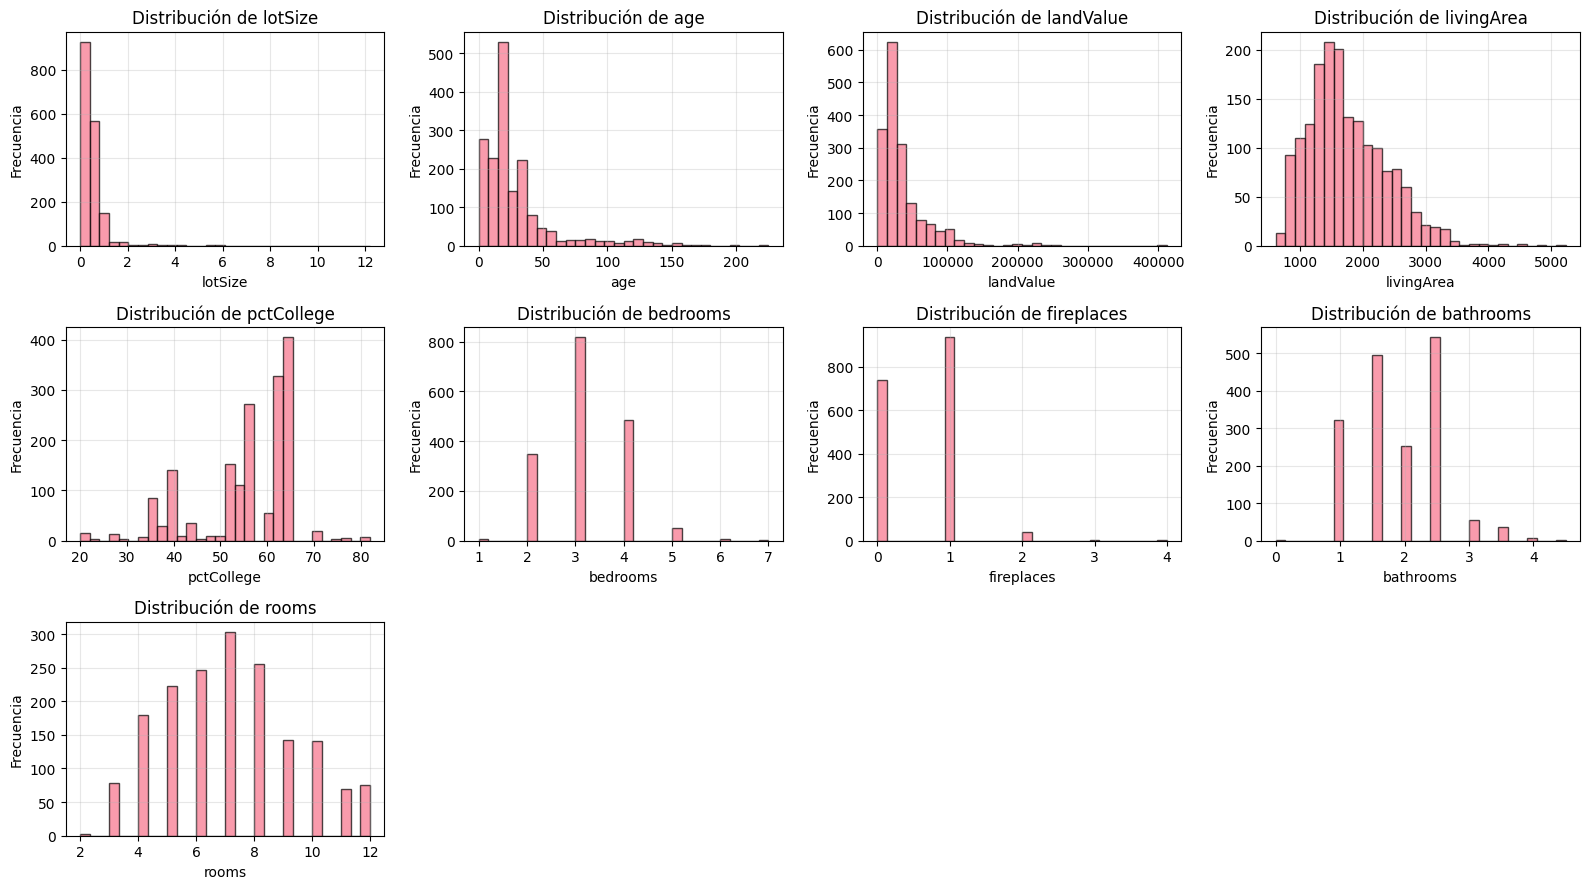

In [8]:
# Visualizar histogramas de variables numéricas
num_vars = [col for col in variables_numericas if col != 'price']
n_cols = 4
n_rows = (len(num_vars) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3))
axes = axes.flatten()

for idx, col in enumerate(num_vars):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].set_title(f'Distribución de {col}')
    axes[idx].grid(True, alpha=0.3)

# Ocultar ejes sobrantes
for idx in range(len(num_vars), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('histogramas_numericas.png', dpi=300, bbox_inches='tight')
plt.show()

## 3. Transformación de Datos

In [9]:
# Codificar variables categóricas
df_encoded = df.copy()

# One-hot encoding para variables categóricas
for col in variables_categoricas:
    dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=True)
    df_encoded = pd.concat([df_encoded, dummies], axis=1)
    df_encoded.drop(col, axis=1, inplace=True)

print(f"Dimensiones después de codificación: {df_encoded.shape}")
print(f"\nNuevas columnas generadas:")
nuevas_columnas = [col for col in df_encoded.columns if col not in variables_numericas]
print(nuevas_columnas)

Dimensiones después de codificación: (1718, 19)

Nuevas columnas generadas:
['heating_hot air', 'heating_hot water/steam', 'fuel_gas', 'fuel_oil', 'sewer_public/commercial', 'sewer_septic', 'waterfront_Yes', 'newConstruction_Yes', 'centralAir_Yes']


In [10]:
# Separar características y variable objetivo
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

print(f"Dimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")

Dimensiones de X: (1718, 18)
Dimensiones de y: (1718,)


In [11]:
# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")

Tamaño del conjunto de entrenamiento: 1374 (80.0%)
Tamaño del conjunto de prueba: 344 (20.0%)


In [12]:
# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir a DataFrame para mantener nombres de columnas
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Escalado completado.")
print(f"Media de características escaladas (train): {X_train_scaled.mean():.6f}")
print(f"Desviación estándar de características escaladas (train): {X_train_scaled.std():.6f}")

Escalado completado.
Media de características escaladas (train): 0.000000
Desviación estándar de características escaladas (train): 1.000000


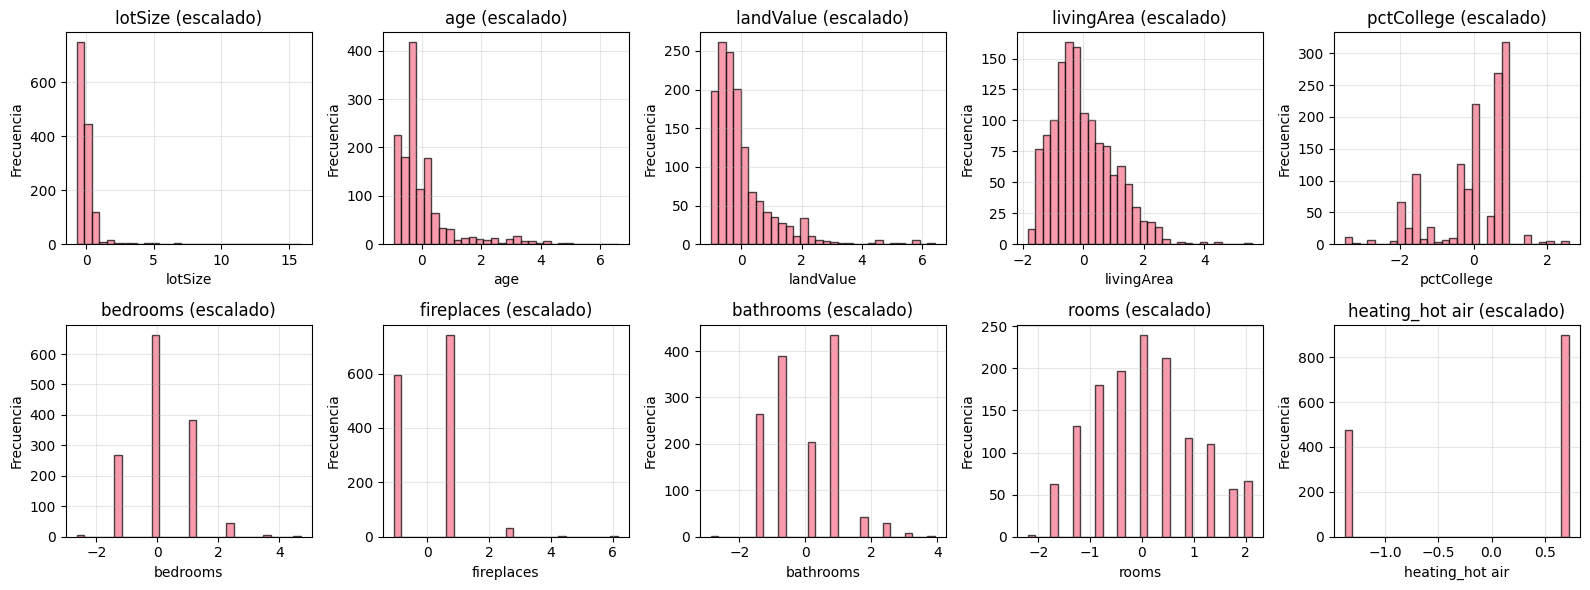

In [13]:
# Visualizar histogramas de variables escaladas (muestra de algunas variables)
vars_to_plot = X_train.columns[:10]  # Primeras 10 variables

fig, axes = plt.subplots(2, 5, figsize=(16, 6))
axes = axes.flatten()

for idx, col in enumerate(vars_to_plot):
    col_idx = list(X_train.columns).index(col)
    axes[idx].hist(X_train_scaled_df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].set_title(f'{col} (escalado)')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('scaled_histogramas_pca.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Análisis de Componentes Principales (PCA)

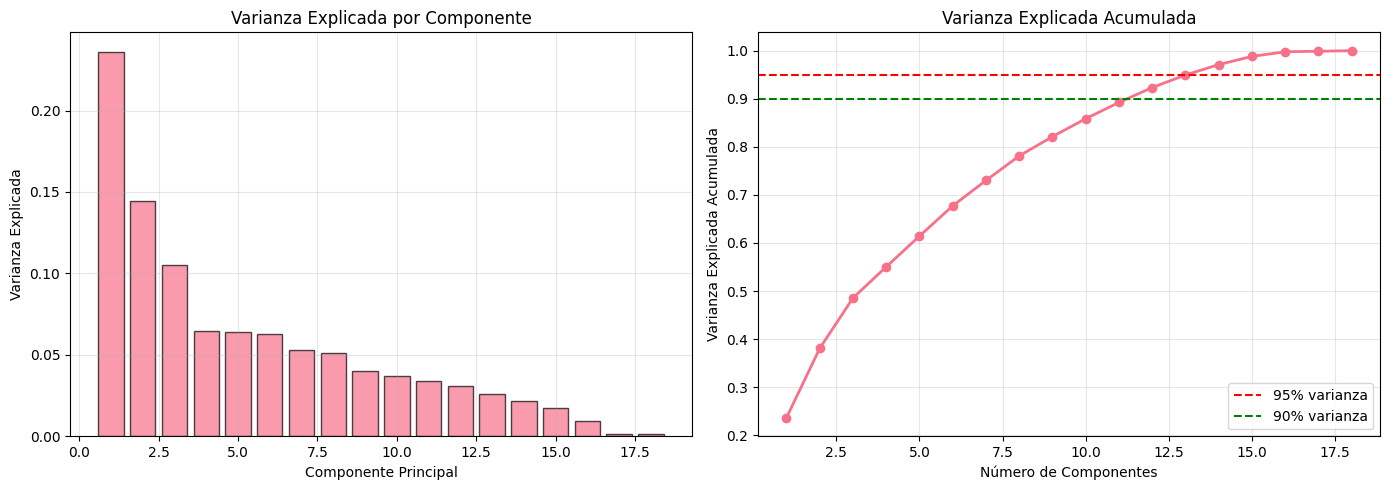


Número de componentes para 95% de varianza: 14
Varianza explicada con 14 componentes: 0.9711


In [14]:
# Aplicar PCA para ver la varianza explicada
pca_full = PCA()
pca_full.fit(X_train_scaled)

# Varianza explicada acumulada
variance_explained = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_explained)

# Visualizar varianza explicada
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de varianza explicada por componente
axes[0].bar(range(1, len(variance_explained) + 1), variance_explained, alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Componente Principal')
axes[0].set_ylabel('Varianza Explicada')
axes[0].set_title('Varianza Explicada por Componente')
axes[0].grid(True, alpha=0.3)

# Gráfico de varianza explicada acumulada
axes[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', linewidth=2)
axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% varianza')
axes[1].axhline(y=0.90, color='g', linestyle='--', label='90% varianza')
axes[1].set_xlabel('Número de Componentes')
axes[1].set_ylabel('Varianza Explicada Acumulada')
axes[1].set_title('Varianza Explicada Acumulada')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Encontrar número de componentes para 95% de varianza
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNúmero de componentes para 95% de varianza: {n_components_95}")
print(f"Varianza explicada con {n_components_95} componentes: {cumulative_variance[n_components_95-1]:.4f}")

In [15]:
# Aplicar PCA con el número óptimo de componentes (95% varianza)
pca = PCA(n_components=n_components_95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Crear DataFrames con componentes principales
pca_columns = [f'PC{i+1}' for i in range(n_components_95)]
X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_columns, index=X_train.index)
X_test_pca_df = pd.DataFrame(X_test_pca, columns=pca_columns, index=X_test.index)

print(f"Dimensiones de X_train después de PCA: {X_train_pca_df.shape}")
print(f"Dimensiones de X_test después de PCA: {X_test_pca_df.shape}")
print(f"\nReducción de dimensionalidad: {X_train.shape[1]} → {n_components_95} features")

Dimensiones de X_train después de PCA: (1374, 14)
Dimensiones de X_test después de PCA: (344, 14)

Reducción de dimensionalidad: 18 → 14 features


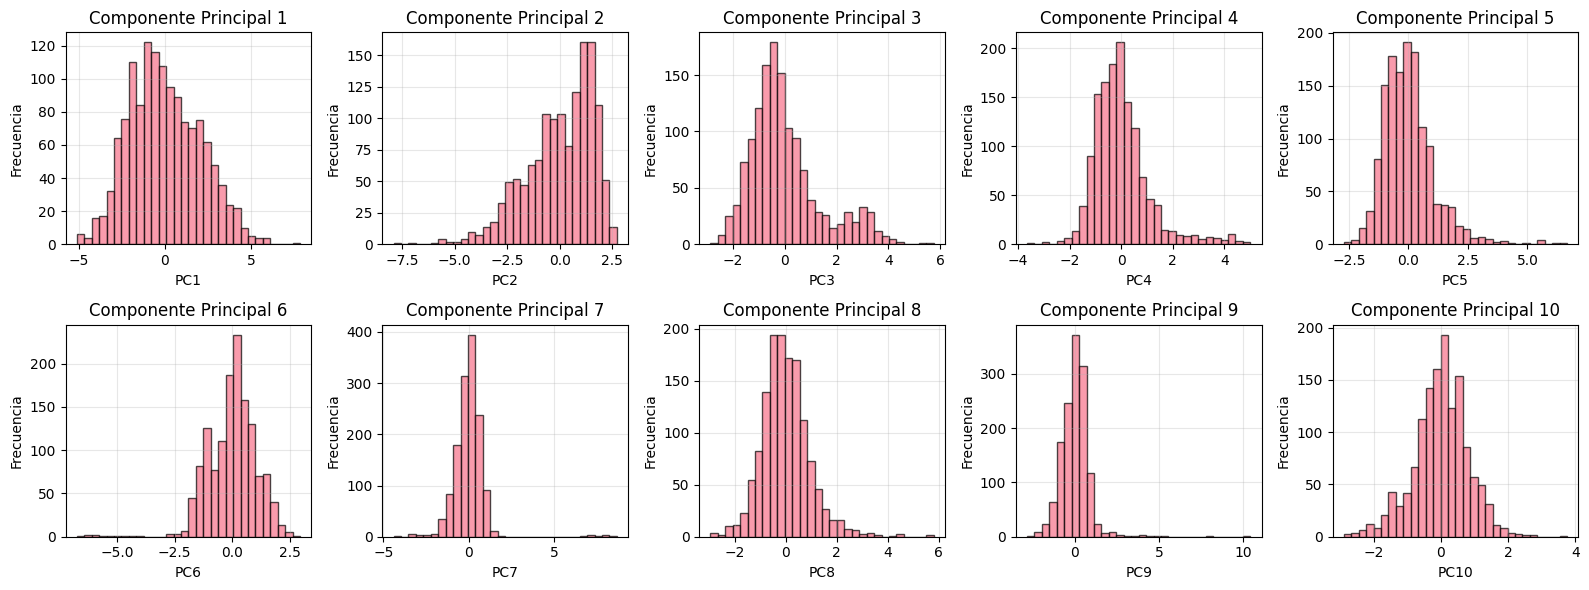

In [16]:
# Visualizar las primeras componentes principales
n_components_to_plot = min(10, n_components_95)

fig, axes = plt.subplots(2, 5, figsize=(16, 6))
axes = axes.flatten()

for idx in range(n_components_to_plot):
    axes[idx].hist(X_train_pca_df.iloc[:, idx], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel(f'PC{idx+1}')
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].set_title(f'Componente Principal {idx+1}')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Guardado de Archivos y Artefactos

In [17]:
# Guardar archivos CSV
# Sin la variable objetivo (solo características escaladas)
train_final = X_train_scaled_df.copy()
test_final = X_test_scaled_df.copy()

# Con PCA (solo características)
train_final_pca = X_train_pca_df.copy()
test_final_pca = X_test_pca_df.copy()

# Guardar archivos
train_final.to_csv('T_train_final.csv', index=False)
test_final.to_csv('T_test_final.csv', index=False)
train_final_pca.to_csv('T_train_PCA.csv', index=False)
test_final_pca.to_csv('T_test_PCA.csv', index=False)

# Archivos objetivo (solo la variable price)
train_final_objetivo = pd.DataFrame({'price': y_train})
test_final_objetivo = pd.DataFrame({'price': y_test})
train_final_objetivo.to_csv('T_train_final_objetivo.csv', index=False)
test_final_objetivo.to_csv('T_test_final_objetivo.csv', index=False)

print("Archivos CSV guardados:")
print("  - T_train_final.csv")
print("  - T_test_final.csv")
print("  - T_train_PCA.csv")
print("  - T_test_PCA.csv")
print("  - T_train_final_objetivo.csv")
print("  - T_test_final_objetivo.csv")

Archivos CSV guardados:
  - T_train_final.csv
  - T_test_final.csv
  - T_train_PCA.csv
  - T_test_PCA.csv
  - T_train_final_objetivo.csv
  - T_test_final_objetivo.csv


In [18]:
# Guardar objetos de preprocesamiento con joblib
joblib.dump(scaler, 'preprocessor_cat.joblib')
joblib.dump(pca, 'pca_artifacts_bundle.zip')

print("\nArtefactos de preprocesamiento guardados:")
print("  - preprocessor_cat.joblib (StandardScaler)")
print("  - pca_artifacts_bundle.zip (Modelo PCA)")


Artefactos de preprocesamiento guardados:
  - preprocessor_cat.joblib (StandardScaler)
  - pca_artifacts_bundle.zip (Modelo PCA)


In [19]:
# Guardar metadatos de PCA en JSON
pca_metadata = {
    'n_components': int(n_components_95),
    'explained_variance_ratio': pca.explained_variance_ratio_.tolist(),
    'total_variance_explained': float(sum(pca.explained_variance_ratio_)),
    'original_features': X_train.columns.tolist(),
    'pca_features': pca_columns
}

with open('pca_metadata.json', 'w') as f:
    json.dump(pca_metadata, f, indent=4)

print("\nMetadatos PCA guardados en pca_metadata.json")


Metadatos PCA guardados en pca_metadata.json


In [20]:
# Guardar lista de columnas esperadas
expected_columns = {
    'categorical_columns': variables_categoricas,
    'numerical_columns': variables_numericas,
    'encoded_columns': X_train.columns.tolist(),
    'pca_columns': pca_columns
}

with open('expected_columns.json', 'w') as f:
    json.dump(expected_columns, f, indent=4)

print("Columnas esperadas guardadas en expected_columns.json")

Columnas esperadas guardadas en expected_columns.json


## 6. Resumen del Preprocesamiento

In [ ]:
print("="*80)
print("RESUMEN DEL PREPROCESAMIENTO")
print("="*80)
print(f"\n1. DATOS ORIGINALES:")
print(f"   - Registros totales: {df.shape[0]}")
print(f"   - Variables numéricas: {len(variables_numericas)}")
print(f"   - Variables categóricas: {len(variables_categoricas)}")
print(f"   - Total de features: {df.shape[1] - 1}")  # -1 por la variable objetivo

print(f"\n2. CODIFICACIÓN:")
print(f"   - Features después de one-hot encoding: {X.shape[1]}")

print(f"\n3. DIVISIÓN DE DATOS:")
print(f"   - Train set: {X_train.shape[0]} registros ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   - Test set: {X_test.shape[0]} registros ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\n4. PCA:")
print(f"   - Componentes principales seleccionados: {n_components_95}")
print(f"   - Varianza explicada: {sum(pca.explained_variance_ratio_)*100:.2f}%")
print(f"   - Reducción de dimensionalidad: {X_train.shape[1]} → {n_components_95}")

print(f"\n5. ARCHIVOS GENERADOS:")
archivos_generados = [
    'T_train_final.csv',
    'T_test_final.csv', 
    'T_train_PCA.csv',
    'T_test_PCA.csv',
    'T_train_final_objetivo.csv',
    'T_test_final_objetivo.csv',
    'preprocessor_cat.joblib',
    'pca_artifacts_bundle.zip',
    'pca_metadata.json',
    'expected_columns.json',
    'boxplots_numericas.png',
    'histogramas_numericas.png',
    'scaled_histogramas_pca.png'
]
for archivo in archivos_generados:
    print(f"   - {archivo}")

print("\n" + "="*80)
# Output de confirmación
print("PREPROCESAMIENTO COMPLETADO EXITOSAMENTE")
print("="*80)

RESUMEN DEL PREPROCESAMIENTO

1. DATOS ORIGINALES:
   - Registros totales: 1718
   - Variables numéricas: 10
   - Variables categóricas: 6
   - Total de features: 15

2. CODIFICACIÓN:
   - Features después de one-hot encoding: 18

3. DIVISIÓN DE DATOS:
   - Train set: 1374 registros (80.0%)
   - Test set: 344 registros (20.0%)

4. PCA:
   - Componentes principales seleccionados: 14
   - Varianza explicada: 97.11%
   - Reducción de dimensionalidad: 18 → 14

5. ARCHIVOS GENERADOS:
   - T_train_final.csv
   - T_test_final.csv
   - T_train_PCA.csv
   - T_test_PCA.csv
   - T_train_final_objetivo.csv
   - T_test_final_objetivo.csv
   - preprocessor_cat.joblib
   - pca_artifacts_bundle.zip
   - pca_metadata.json
   - expected_columns.json
   - boxplots_numericas.png
   - histogramas_numericas.png
   - scaled_histogramas_pca.png

PREPROCESAMIENTO COMPLETADO EXITOSAMENTE


## Fin de ejecución